# Titanic ML

## Загружаем библиотеки работы с данными, а также сами данные

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Проверим, что данные загрузились, заодно посмотрим, как они выглядят

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Проверим наличие незаполненных полей

In [4]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

   ## Заполним недостающие данные колонки Age медианой остальных значений и пустые ячейки Embarked значением 'S'

In [5]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

## Уберем колонки-идентификаторы пассажиров, а также колонку Cabin, т.к. около 80% ее значений не заполнено

In [6]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Проведем EDA

In [7]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Посмотрим, как пол пассажира повлиял на его выживание

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


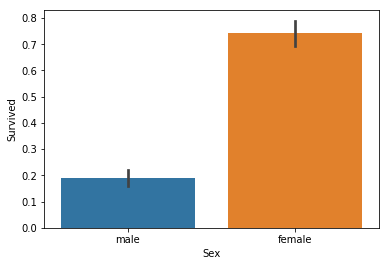

In [8]:
#Посмотрим, как пол пассажира повлиял на его выживание
sns.barplot(x='Sex', y='Survived',data=train_data)

### Видим, что с корабля спаслось больше женщин, чем мужчин. Скорее всего их сажали на шлюпки в первую очередь.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


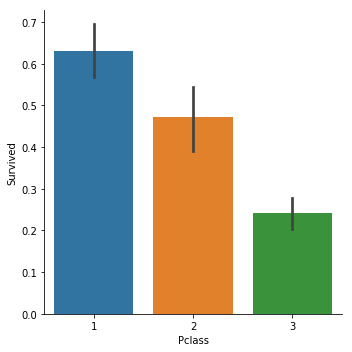

In [9]:
#Посмотрим на распределение по классам пассажиров
sns.catplot(x='Pclass', y='Survived',  kind='bar', data=train_data)

### Можно заметить, что чем "элитнее" пассажир, тем большая вероятность его выживания.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


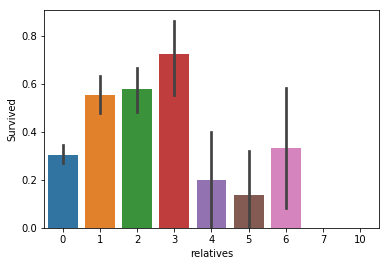

In [10]:
#Посмотрим, как на шансы спастись могло повлиять количество родственников на борту
data = [train_data,test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

sns.barplot(x='relatives', y='Survived', data=train_data)

### Из графика видно, что при количестве родственников на борту большем 3, шансы на выживание значительно падают.

In [11]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
5,0,3,male,28.0,0,0,8.4583,Q,0
6,0,1,male,54.0,0,0,51.8625,S,0
7,0,3,male,2.0,3,1,21.0750,S,4
8,1,3,female,27.0,0,2,11.1333,S,2
9,1,2,female,14.0,1,0,30.0708,C,1


## Закодируем категориальные признаки числами

In [12]:
from sklearn.preprocessing import LabelEncoder
def encode_features(data, features):
    for feature in features:
        le = LabelEncoder()
        le.fit(data[feature])
        encoded_column = le.transform(data[feature])
        data[feature] = encoded_column
    return data

to_encode = ['Sex', 'Embarked']
train_data = encode_features(train_data, to_encode)
test_data = encode_features(test_data, to_encode)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


## Затем расширим их, добавив бинарные признаки принадлежности к каждой категории

In [13]:
sex_binaries = pd.get_dummies(train_data['Sex'], prefix='Sex_')
embark_binaries = pd.get_dummies(train_data['Embarked'], prefix='Embarked_')
train_data = pd.concat([train_data, sex_binaries, embark_binaries], axis=1)

sex_binaries = pd.get_dummies(test_data['Sex'], prefix='Sex_')
embark_binaries = pd.get_dummies(test_data['Embarked'], prefix='Embarked_')
test_data = pd.concat([test_data, sex_binaries, embark_binaries], axis=1)

test_data.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Sex__0,Sex__1,Embarked__0,Embarked__1,Embarked__2
0,892,3,1,34.5,0,0,7.8292,1,0,0,1,0,1,0
1,893,3,0,47.0,1,0,7.0000,2,1,1,0,0,0,1
2,894,2,1,62.0,0,0,9.6875,1,0,0,1,0,1,0
3,895,3,1,27.0,0,0,8.6625,2,0,0,1,0,0,1
4,896,3,0,22.0,1,1,12.2875,2,2,1,0,0,0,1
5,897,3,1,14.0,0,0,9.2250,2,0,0,1,0,0,1
6,898,3,0,30.0,0,0,7.6292,1,0,1,0,0,1,0
7,899,2,1,26.0,1,1,29.0000,2,2,0,1,0,0,1
8,900,3,0,18.0,0,0,7.2292,0,0,1,0,1,0,0
9,901,3,1,21.0,2,0,24.1500,2,2,0,1,0,0,1


In [14]:
train_data.drop(['Sex', 'SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)
test_data.drop(['Sex', 'SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)

test_data.head(10)

,PassengerId,Pclass,Age,Fare,relatives,Sex__0,Sex__1,Embarked__0,Embarked__1,Embarked__2
0,892,3,34.5,7.8292,0,0,1,0,1,0
1,893,3,47.0,7.0000,1,1,0,0,0,1
2,894,2,62.0,9.6875,0,0,1,0,1,0
3,895,3,27.0,8.6625,0,0,1,0,0,1
4,896,3,22.0,12.2875,2,1,0,0,0,1
5,897,3,14.0,9.2250,0,0,1,0,0,1
6,898,3,30.0,7.6292,0,1,0,0,1,0
7,899,2,26.0,29.0000,2,0,1,0,0,1
8,900,3,18.0,7.2292,0,1,0,1,0,0
9,901,3,21.0,24.1500,2,0,1,0,0,1


## Разбиваем данные на фолды

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

skf = list(StratifiedKFold(n_splits = 4, shuffle=True, random_state=177).split(X, y))

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
cvs = cross_val_score(tree, X, y, scoring='roc_auc', cv=skf)
print("Score of Decision Tree: {}" .format(cvs.mean()))

Score of Decision Tree: 0.7451077269674448


## KNN (6 neighbors)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, n_jobs=12)
cvs = cross_val_score(knn, X, y, scoring='roc_auc', cv=skf)
print("Score of KNN: {}" .format(cvs.mean()))

Score of KNN: 0.7534102830795253


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=177, n_estimators=100, min_samples_split=6, min_samples_leaf=2)
cvs = cross_val_score(forest, X, y, scoring='roc_auc', cv=skf)
print("Score of Random Forest: {}" .format(cvs.mean()))

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Score of Random Forest: 0.8608340540130646


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
cvs = cross_val_score(logreg, X, y, scoring='roc_auc', cv=skf)
print("Score of Logistic Regression: {}" .format(cvs.mean()))

Score of Logistic Regression: 0.8490640153901303


## Лучший результат показал Random Forest, используем его

In [20]:
forest.fit(X, y)
prediction = forest.predict(test_data.drop(['PassengerId'], axis=1))
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction 
    })
submission.to_csv("submission.csv", index=False)

In [21]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
